<a href="https://colab.research.google.com/github/shama1996/Tensorflow/blob/main/TENSOR_FLOW_(19_JUNE)_ALEXNET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install tflearn

     |████████████████████████████████| 112kB 32.5MB/s 
  Created wheel for tflearn: filename=tflearn-0.5.0-cp37-none-any.whl size=127300 sha256=7d8c96509a5d097ecfcb7d22a2963516168468744f478a6ae33ad76806886f07
  Stored in directory: /root/.cache/pip/wheels/31/d2/ed/fb9a0d301dd9586c11e9547120278e624227f22fd5f4baf744
Successfully built tflearn


In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dropout
from tensorflow.keras.layers import Dense, Activation, Flatten

tf.keras.layers.BatchNormalization

import numpy as np
np.random.seed(1000)
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam

from tensorflow.keras import callbacks

In [5]:
#get data
import tflearn.datasets.oxflower17 as oxflower17
x,y=oxflower17.load_data(one_hot=True)

Instructions for updating:
non-resource variables are not supported in the long term


100.0% 60276736 / 60270631


Succesfully downloaded 17flowers.tgz 60270631 bytes.
File Extracted
Starting to parse images...
Parsing Done!


In [6]:
#create a sequential model
model=Sequential()

#1st convolutional layer
model.add(Conv2D(filters=96,input_shape=(224,224,3),kernel_size=(11,11),strides=(4,4),padding='valid'))
model.add(Activation('relu'))

In [7]:
#pooling
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))

#BatchNormalization before passing it to the next layer
model.add(tf.keras.layers.BatchNormalization())

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
#2nd convolutional layer
model.add(Conv2D(filters=256,kernel_size=(11,11),strides=(1,1),padding='valid'))
model.add(Activation('relu'))

In [9]:
#pooling
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))
#BatchNormalization before passing it to the next layer
model.add(tf.keras.layers.BatchNormalization())

In [10]:
#3rd convolutional layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding='valid'))
model.add(Activation('relu'))

In [11]:
#4th convolutional layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding='valid'))
model.add(Activation('relu'))

#BatchNormalization before passing it to the next layer
model.add(tf.keras.layers.BatchNormalization())

#5th convolutional layer
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding='valid'))
model.add(Activation('relu'))
#pooling
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))

#BatchNormalization before passing it to the next layer
model.add(tf.keras.layers.BatchNormalization())

#passing it to dense layer
model.add(Flatten())

In [14]:
#1st ense layer
model.add(Dense(4096,input_shape=(224*224*3,)))
model.add(Activation('relu'))


#add dropout to prevent overfitting
model.add(Dropout(0.4))
#BatchNormalization 
model.add(tf.keras.layers.BatchNormalization())

#2nd dense layer
model.add(Dense(4096))
model.add(Activation('relu'))

#add dropout
model.add(Dropout(0.4))
#BatchNormalization 
model.add(tf.keras.layers.BatchNormalization())

#3rd dense layer
model.add(Dense(1000))
model.add(Activation('relu'))

#add dropout
model.add(Dropout(0.4))
#BatchNormalization 
model.add(tf.keras.layers.BatchNormalization())

#output layer
model.add(Dense(17))
model.add(Activation('softmax'))

model.summary()

#4 compile
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
checkpoint_cb=tf.keras.callbacks.ModelCheckpoint('Model-{epoch:02d}.h5')
#train
model.fit(x,y,batch_size=64,epochs=10,verbose=1,validation_split=0.2,shuffle=True,callbacks=[checkpoint_cb])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 54, 54, 96)        34944     
_________________________________________________________________
activation (Activation)      (None, 54, 54, 96)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 17, 17, 256)       2973952   
_________________________________________________________________
activation_1 (Activation)    (None, 17, 17, 256)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 256)         0

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


1088/1088 [==============================] - 167s 153ms/sample - loss: 3.9163 - acc: 0.0763 - val_loss: 2.8519 - val_acc: 0.0662
Epoch 2/10
1088/1088 [==============================] - 162s 149ms/sample - loss: 3.0621 - acc: 0.1167 - val_loss: 2.9051 - val_acc: 0.0368
Epoch 3/10
1088/1088 [==============================] - 161s 148ms/sample - loss: 2.9322 - acc: 0.1287 - val_loss: 2.9355 - val_acc: 0.0588
Epoch 4/10
1088/1088 [==============================] - 170s 157ms/sample - loss: 2.8661 - acc: 0.1195 - val_loss: 2.9233 - val_acc: 0.0368
Epoch 5/10
1088/1088 [==============================] - 168s 154ms/sample - loss: 3.0144 - acc: 0.1121 - val_loss: 2.9255 - val_acc: 0.0368
Epoch 6/10
1088/1088 [==============================] - 167s 153ms/sample - loss: 2.8659 - acc: 0.1195 - val_loss: 2.9120 - val_acc: 0.0368
Epoch 7/10
1088/1088 [==============================] - 168s 155ms/sample - loss: 2.8669 - acc: 0.1369 - val_loss: 2.9107 - val_acc: 0.0699
Epoch 8/10
1088/1088 [=========

In [ ]:
import tflearn.datasets.oxflower17 as oxflower17
x,y=oxflower17.load_data(one_hot=True)

Instructions for updating:
non-resource variables are not supported in the long term
curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [ ]:
x.shape

(1360, 224, 224, 3)

In [ ]:
import matplotlib.pyplot as plt

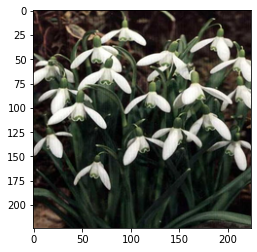

In [ ]:
plt.imshow(x[2])